In [5]:
% matplotlib inline
import numpy as np
from pylab import *


dt = 0.01
n_steps = 1000

In [6]:
u = np.zeros((n_steps))
u[0] = -65              # in mV
I_in = 0.01*np.ones((n_steps))  # in 
R_M = 7                 # in 
tau = 0.1               # in ms
u_rest = 5                 # in mv
u_thresh = -10
u_spike = 40
spike_flag = False

In [7]:
for i in arange(n_steps-1):    
    
    if spike_flag:
        u[i+1]=-65
        spike_flag = False
    elif u[i]>u_thresh:
        u[i+1]=u_spike
        spike_flag = True
    else:
        dudt = (u_rest + R_M*I_in[i]- u[i])/tau
        u[i+1] = u[i]+dt* dudt
        

print(u[1])
print(I_in[1])
print(u[2])
print(I_in[2])

-57.993
0.01
-51.6867
0.01


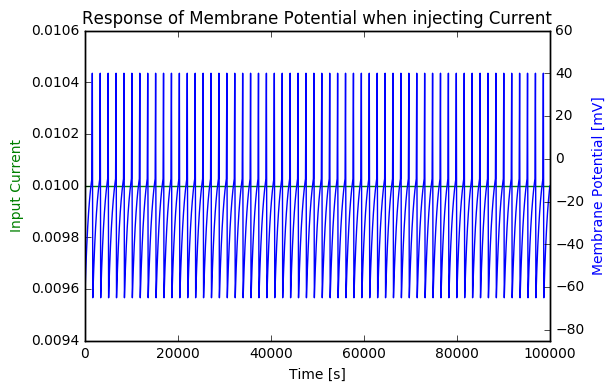

In [8]:
tt = np.linspace(0, n_steps/dt, n_steps)
fig, ax1 = subplots()

ax2 = ax1.twinx()
ax1.plot(tt, I_in, 'g-')
ax2.plot(tt, u, 'b-')

ax1.set_xlabel('Time [s]')
ax1.set_ylabel('Input Current', color='g') # which unit?
ax2.set_ylabel('Membrane Potential [mV]', color='b')
ax2.set_ylim([-85, 60])
title("Response of Membrane Potential when injecting Current")
show()